# 1. Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 2. Load the Dataset

In [3]:
df = pd.read_csv("Mall_Customers.csv")
print(df.head())
print(df.info())
print("\nShape of Dataset:", df.shape)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Shape of Dataset: (200, 5)


# 3. Data Preprocessing

In [5]:
# Selecting the required features
selected_features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

print("\nFeatures standardized successfully.")


Features standardized successfully.


# 4. Finding Optimal K (Elbow Method)

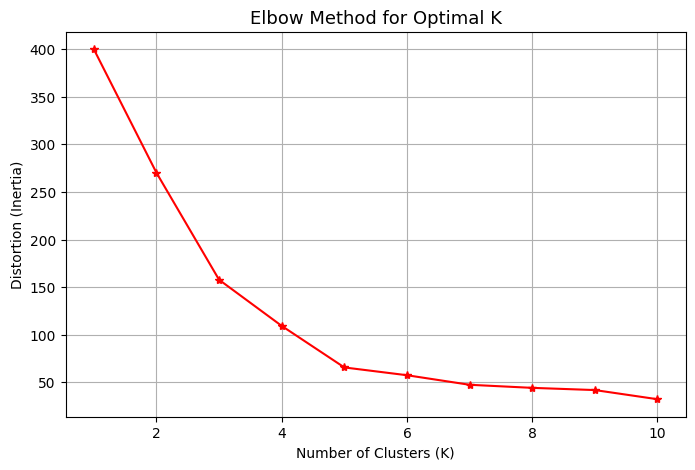

Elbow curve plotted. Choose the K where curve bends (usually K=5).


In [6]:
distortions = []
cluster_range = range(1, 11)

for k in cluster_range:
    km = KMeans(n_clusters=k, init='k-means++', random_state=7)
    km.fit(scaled_features)
    distortions.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(cluster_range, distortions, 'r*-')
plt.title("Elbow Method for Optimal K", fontsize=13)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Distortion (Inertia)")
plt.grid(True)
plt.show()

print("Elbow curve plotted. Choose the K where curve bends (usually K=5).")


# 5. Apply K-Means Clustering

In [7]:
optimal_k = 5
model_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=7)
cluster_labels = model_kmeans.fit_predict(scaled_features)

df['Customer_Group'] = cluster_labels
print("\nCluster assignment completed.")
print(df.head())


Cluster assignment completed.
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Customer_Group  
0               4  
1               0  
2               4  
3               0  
4               4  


# 6.Visualize Clusters

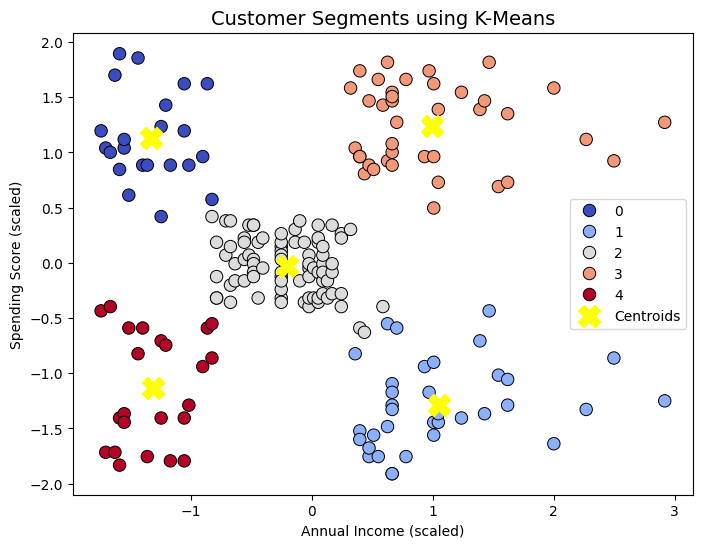

Cluster visualization completed.


In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scaled_features[:,0],
    y=scaled_features[:,1],
    hue=cluster_labels,
    palette='coolwarm',
    s=80,
    edgecolor='black'
)
plt.scatter(
    model_kmeans.cluster_centers_[:,0],
    model_kmeans.cluster_centers_[:,1],
    s=250, c='yellow', marker='X', label='Centroids'
)
plt.title("Customer Segments using K-Means", fontsize=14)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()
print("Cluster visualization completed.")

# 7.Evaluate Clustering

In [9]:
silhouette = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score for K={optimal_k} is: {round(silhouette, 3)}")

if silhouette >= 0.5:
    print("Excellent cluster separation achieved.")
elif silhouette >= 0.3:
    print("Fair clustering result.")
else:
    print("Clusters may overlap; consider adjusting K or preprocessing.")

Silhouette Score for K=5 is: 0.555
Excellent cluster separation achieved.


# 8.Save the Clustered Data

In [11]:
output_path = "task8_clustered_customers.csv"
df.to_csv(output_path, index=False)
print(f"Clustered dataset saved as '{output_path}'")

Clustered dataset saved as 'task8_clustered_customers.csv'
